---

# **IT Training Assignment Class 4**

---

### **Import Required Libraries**

In [22]:
import numpy as np
import cv2

### **Task 01: 1D & 2D Array Operations**

In [5]:
# Create a 1D and 2D array (Global Variables)
array_1d = np.array([1, 2, 3, 4, 5])
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [6]:
# Output the arrays
print("1D Array:\n", array_1d)
print("2D Array:\n", array_2d)

1D Array:
 [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
# Implement a function for Basic array Operations
def basic_array_operations():
  # 1D array operations
  print("Sum of 1D Array:", np.sum(arr_1d))

  # 2D array operations
  print("Mean of a 2D Array::", np.mean(arr_2d))
  print("Transpose of 2D Array:\n",arr_2d.T)


In [8]:
# Create global array variables
global arr_1d;
global arr_2d;

arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Call basic array operations function
basic_array_operations()

Sum of 1D Array: 15
Mean of a 2D Array:: 5.0
Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


### **Task 02: Image Processing with NumPy**

In [9]:
# Implement a function to create and crop the image using local variables
def image_processing():
  # Create a grayscale image using 2d numpy array
  image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)

  # Print original Image
  print("Original Image:\n", image)

  # Crop the image
  cropped = image[1:4, 1:4]
  # Invert colors
  inverted_image = 255 - image

  # Print cropped section of image
  print("Cropped Section:\n", cropped)
  # Print inverted image
  print("Inverted Image:\n", inverted_image)

In [10]:
# Call the image processing function to print output
image_processing()

Original Image:
 [[  8 191 154  96  18]
 [170  79  76  24 132]
 [ 11  55 125 109 128]
 [146 199  38  52 156]
 [159 194  54 237 123]]
Cropped Section:
 [[ 79  76  24]
 [ 55 125 109]
 [199  38  52]]
Inverted Image:
 [[247  64 101 159 237]
 [ 85 176 179 231 123]
 [244 200 130 146 127]
 [109  56 217 203  99]
 [ 96  61 201  18 132]]


### **Task 03: Augmented Reality Transformation: Perform linear algebra operations like scaling, rotation, and translation.**

In [33]:
# Loading my image
image = cv2.imread('my_image.png')

In [40]:
# Implement a function to scale image by a scale factor
def scale_image(image, scale_factor):
  # Create a scale matrix from scale factor

  scaling_matrix = np.array([[scale_factor, 0, 0],
                             [0, scale_factor, 0],
                             [0, 0, 1]])
  # Get image dimensions
  rows, cols = image.shape[:2]

  # Apply transformation and return scaled image
  scaled_image = cv2.warpPerspective(image, scaling_matrix, (cols, rows))
  return scaled_image

In [16]:
# Implement a function to rotate and image by a given angle
def rotate_image(image, angle):
  # Get image dimensions
  rows, cols = image.shape[:2]

  # Calculate rotation matrix
  rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)

  # Apply rotation and return the rotated image
  rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
  return rotated_image

In [28]:
# Implement a function to translate an image to x, y axis
def translate_image(image, tx, ty):
  # Create translation matrix
  translation_matrix = np.array([[1, 0, tx],
                                 [0, 1, ty]], dtype=np.float32)
  # Get image dimensions
  rows, cols = image.shape[:2]

  # Apply transformation
  translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
  return translated_image

Original Image


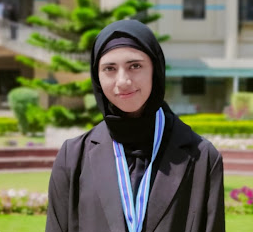

Scaled Image


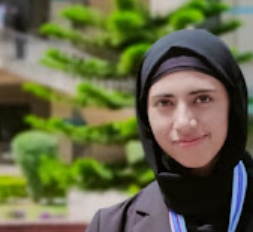

Rotated Image


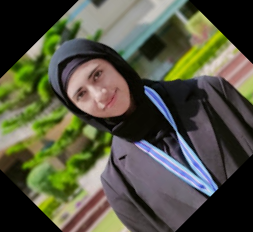

Translated Image


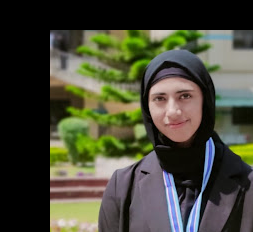

In [41]:
from google.colab import cv2_imshow
# Apply all transformations and show image with transformation results
scaled_image = scale_image(image, 1.5)
rotated_image = rotate_image(image, 45)
translated_image = translate_image(image, 50, 30)

# Show all the images
print("Original Image")
cv2_imshow(image)

print("Scaled Image")
cv2_imshow(scaled_image)

print("Rotated Image")
cv2_imshow(rotated_image)

print("Translated Image")
cv2_imshow(translated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **Task 04: Face Detection from Image Arrays – Extract facial features by slicing a NumPy-based image array.**

In [48]:
# Preprocess Image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [49]:
# Load OpenCV's pretrained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [50]:
# Detect face in image
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

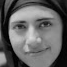

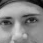

Detected Face


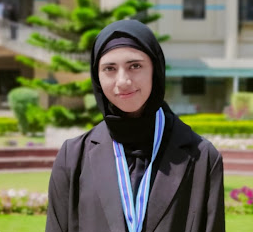

In [51]:
# Loop through detected faces and extracted facial features
for (x, y, w, h) in faces:
  # Extract facial features
  face_roi = image_gray[y:y+h, x:x+w]

  # Display face region
  cv2_imshow(face_roi)

  # Extract additional features
  eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  eyes = eyes_cascade.detectMultiScale(face_roi, scaleFactor=1.1, minNeighbors=5)

  # Display eye regions
  for (ex, ey, ew, eh) in eyes:
    eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
    cv2_imshow(eye_roi)

# Show original image with detected face
print("Detected Face")
cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()

---